### 1 - Importar a base de dados
### 2 - Visualizar e tratar essa base de dados
### 3 - Dar uma olhada na sua base de dados
### 4 - Construir uma análise para identificar o motivo do aumento de cancelamento por parte dos clientes

In [1]:
# importando as bbliotecas necessárias para a análises
import pandas as pd
import plotly.express as px

In [2]:
# Visualizando a base de dados
tabela = pd.read_csv('ClientesBanco.csv', encoding='latin1')
display(tabela)

CLIENTNUM  Categoria  Idade Sexo  Dependentes           Educação  \
0      768805383    Cliente     45    M            3       Ensino Médio   
1      818770008    Cliente     49    F            5    Ensino Superior   
2      713982108    Cliente     51    M            3    Ensino Superior   
3      769911858    Cliente     40    F            4       Ensino Médio   
4      709106358    Cliente     40    M            3  Sem ensino formal   
...          ...        ...    ...  ...          ...                ...   
10122  772366833    Cliente     50    M            2    Ensino Superior   
10123  710638233  Cancelado     41    M            2      Não informado   
10124  716506083  Cancelado     44    F            1       Ensino Médio   
10125  717406983  Cancelado     30    M            2    Ensino Superior   
10126  714337233  Cancelado     43    F            2    Ensino Superior   

        Estado Civil Faixa Salarial Anual Categoria Cartão  \
0             Casado          $60K - $80K             Blue   
1           Solteiro       Less than $40K             Blue   
2             Casado         $80K - $120K             Blue   
3      Não informado       Less than $40K             Blue   
4             Casado          $60K - $80K             Blue   
...              ...                  ...              ...   
10122       Solteiro          $40K - $60K             Blue   
10123     Divorciado          $40K - $60K             Blue   
10124         Casado       Less than $40K             Blue   
10125  Não informado          $40K - $60K             Blue   
10126         Casado       Less than $40K           Silver   

       Meses como Cliente  ...  Inatividade 12m  Contatos 12m   Limite  \
0                      39  ...                1             3  12691.0   
1                      44  ...                1             2   8256.0   
2                      36  ...                1             0   3418.0   
3                      34  ...                4             1   3313.0   
4                      21  ...                1             0   4716.0   
...                   ...  ...              ...           ...      ...   
10122                  40  ...                2             3   4003.0   
10123                  25  ...                2             3   4277.0   
10124                  36  ...                3             4   5409.0   
10125                  36  ...                3             3   5281.0   
10126                  25  ...                2             4  10388.0   

       Limite Consumido  Limite Disponível  Mudanças Transacoes_Q4_Q1  \
0                   777            11914.0                   1335.000   
1                   864             7392.0                   1541.000   
2                     0             3418.0                   2594.000   
3                  2517              796.0                   1405.000   
4                     0             4716.0                   2175.000   
...                 ...                ...                        ...   
10122              1851             2152.0                      0.703   
10123              2186             2091.0                      0.804   
10124                 0             5409.0                      0.819   
10125                 0             5281.0                      0.535   
10126              1961             8427.0                      0.703   

       Valor Transacoes 12m  Qtde Transacoes 12m  \
0                      1144                   42   
1                      1291                   33   
2                      1887                   20   
3                      1171                   20   
4                       816                   28   
...                     ...                  ...   
10122                 15476                  117   
10123                  8764                   69   
10124                 10291                   60   
10125                  8395                   62   
10126                 1

## Vamos agora analisar as colunas para ver se existe alguma que não será útil para a analise, e exclui-la
- Verifiquei que a coluna 'CLIENTNUM' não seria  de muito valor, então vou exclui-la da base de dados

In [3]:
# Apagando a coluna "CLIENTNUN" da base de dados
tabela = tabela.drop("CLIENTNUM", axis = 1)
display(tabela)

Categoria  Idade Sexo  Dependentes           Educação   Estado Civil  \
0        Cliente     45    M            3       Ensino Médio         Casado   
1        Cliente     49    F            5    Ensino Superior       Solteiro   
2        Cliente     51    M            3    Ensino Superior         Casado   
3        Cliente     40    F            4       Ensino Médio  Não informado   
4        Cliente     40    M            3  Sem ensino formal         Casado   
...          ...    ...  ...          ...                ...            ...   
10122    Cliente     50    M            2    Ensino Superior       Solteiro   
10123  Cancelado     41    M            2      Não informado     Divorciado   
10124  Cancelado     44    F            1       Ensino Médio         Casado   
10125  Cancelado     30    M            2    Ensino Superior  Não informado   
10126  Cancelado     43    F            2    Ensino Superior         Casado   

      Faixa Salarial Anual Categoria Cartão  Meses como Cliente  \
0              $60K - $80K             Blue                  39   
1           Less than $40K             Blue                  44   
2             $80K - $120K             Blue                  36   
3           Less than $40K             Blue                  34   
4              $60K - $80K             Blue                  21   
...                    ...              ...                 ...   
10122          $40K - $60K             Blue                  40   
10123          $40K - $60K             Blue                  25   
10124       Less than $40K             Blue                  36   
10125          $40K - $60K             Blue                  36   
10126       Less than $40K           Silver                  25   

       Produtos Contratados  Inatividade 12m  Contatos 12m   Limite  \
0                         5                1             3  12691.0   
1                         6                1             2   8256.0   
2                         4                1             0   3418.0   
3                         3                4             1   3313.0   
4                         5                1             0   4716.0   
...                     ...              ...           ...      ...   
10122                     3                2             3   4003.0   
10123                     4                2             3   4277.0   
10124                     5                3             4   5409.0   
10125                     4                3             3   5281.0   
10126                     6                2             4  10388.0   

       Limite Consumido  Limite Disponível  Mudanças Transacoes_Q4_Q1  \
0                   777            11914.0                   1335.000   
1                   864             7392.0                   1541.000   
2                     0             3418.0                   2594.000   
3                  2517              796.0                   1405.000   
4                     0             4716.0                   2175.000   
...                 ...                ...                        ...   
10122              1851             2152.0                      0.703   
10123              2186             2091.0                      0.804   
10124                 0             5409.0                      0.819   
10125                 0             5281.0                      0.535   
10126              1961             8427.0                      0.703   

       Valor Transacoes 12m  Qtde Transacoes 12m  \
0                      1144                   42   
1                      1291                   33   
2                      1887                   20   
3                      1171                   20   
4                       816                   28   
...                     ...                  ...   
10122                 15476                  117   
10123                  8764                   69   
10124                 10291                   60   
101

### Vamos pesquisar se a tabela contém itens vazios
 

In [4]:
display(tabela.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Categoria                      10127 non-null  object 
 1   Idade                          10127 non-null  int64  
 2   Sexo                           10127 non-null  object 
 3   Dependentes                    10127 non-null  int64  
 4   Educação                       10127 non-null  object 
 5   Estado Civil                   10127 non-null  object 
 6   Faixa Salarial Anual           10127 non-null  object 
 7   Categoria Cartão               10126 non-null  object 
 8   Meses como Cliente             10127 non-null  int64  
 9   Produtos Contratados           10127 non-null  int64  
 10  Inatividade 12m                10127 non-null  int64  
 11  Contatos 12m                   10127 non-null  int64  
 12  Limite                         10127 non-null 

None

### Encontrei uma lina com um item vazio
### Agora vou rodar um comando que exclui as linhas que contém pelo menos um item vazio

In [5]:
tabela = tabela.dropna()
display(tabela.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10126 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Categoria                      10126 non-null  object 
 1   Idade                          10126 non-null  int64  
 2   Sexo                           10126 non-null  object 
 3   Dependentes                    10126 non-null  int64  
 4   Educação                       10126 non-null  object 
 5   Estado Civil                   10126 non-null  object 
 6   Faixa Salarial Anual           10126 non-null  object 
 7   Categoria Cartão               10126 non-null  object 
 8   Meses como Cliente             10126 non-null  int64  
 9   Produtos Contratados           10126 non-null  int64  
 10  Inatividade 12m                10126 non-null  int64  
 11  Contatos 12m                   10126 non-null  int64  
 12  Limite                         10126 non-null  floa

None

### Vamos agorar olha como estão distribuidas as médias, o minimo, o maximo e outros paramentros importantes para nossa análise 

In [10]:
# Descrevendo nossa tabela e arredondando
display(tabela.describe().round(1))

Idade  Dependentes  Meses como Cliente  Produtos Contratados  \
count  10126.0      10126.0             10126.0               10126.0   
mean      46.3          2.3                35.9                   3.8   
std        8.0          1.3                 8.0                   1.6   
min       26.0          0.0                13.0                   1.0   
25%       41.0          1.0                31.0                   3.0   
50%       46.0          2.0                36.0                   4.0   
75%       52.0          3.0                40.0                   5.0   
max       73.0          5.0                56.0                   6.0   

       Inatividade 12m  Contatos 12m   Limite  Limite Consumido  \
count          10126.0       10126.0  10126.0           10126.0   
mean               2.3           2.5   8632.0            1162.8   
std                1.0           1.1   9089.2             815.0   
min                0.0           0.0   1438.3               0.0   
25%                2.0           2.0   2555.0             358.0   
50%                2.0           2.0   4549.0            1276.0   
75%                3.0           3.0  11067.8            1784.0   
max                6.0           6.0  34516.0            2517.0   

       Limite Disponível  Mudanças Transacoes_Q4_Q1  Valor Transacoes 12m  \
count            10126.0                    10126.0               10126.0   
mean              7469.2                      108.7                4404.4   
std               9091.1                      353.9                3397.2   
min                  3.0                        0.0                 510.0   
25%               1324.2                        0.6                2156.0   
50%               3473.0                        0.7                3899.5   
75%               9860.0                        0.9                4741.0   
max              34516.0                     3397.0               18484.0   

       Qtde Transacoes 12m  Mudança Qtde Transações_Q4_Q1  \
count              10126.0                        10126.0   
mean                  64.9                           66.6   
std                   23.5                          284.0   
min                   10.0                            0.0   
25%                   45.0                            0.6   
50%                   67.0                            0.7   
75%                   81.0                            0.8   
max                  139.0                         3714.0   

       Taxa de Utilização Cartão  
count                    10126.0  
mean                         0.3  
std                          0.3  
min                          0.0  
25%                          0.0  
50%                          0.2  
75%                          0.5  
max                          1.0

## Vamos avaliar como está a divisão entre Clientes x Cancelados

In [13]:
qtde_categoria = tabela['Categoria'].value_counts()
display(qtde_categoria)

qtde_categoria_perc = tabela['Categoria'].value_counts(normalize=True)
display(qtde_categoria_perc)

Categoria
Cliente      8499
Cancelado    1627
Name: count, dtype: int64

Categoria
Cliente      0.839325
Cancelado    0.160675
Name: proportion, dtype: float64

## Temos várias formas de descobri o motivo de cancelamentro
- Podemos olhar a comparação entre Clientes e Cancelados em cada uma das colunas da nossa base de dados, para ver se essa informação traz algum insight novo para a gente.

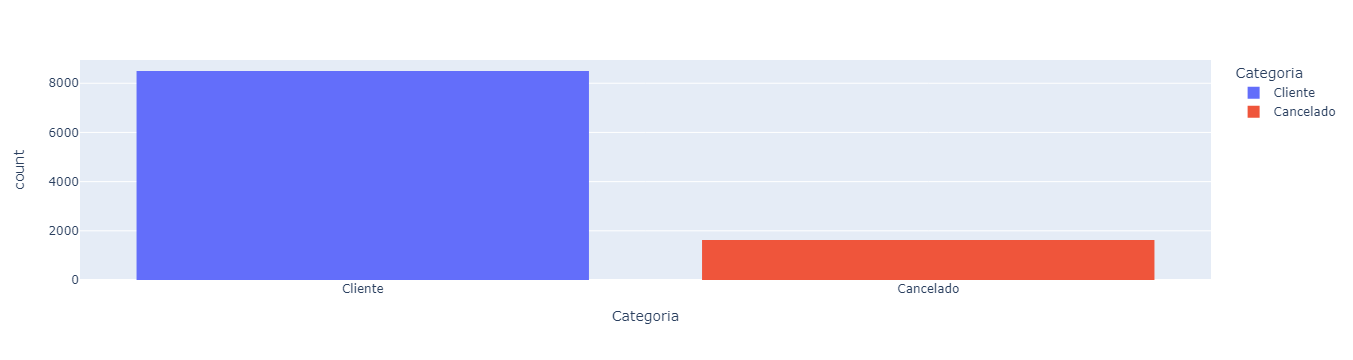

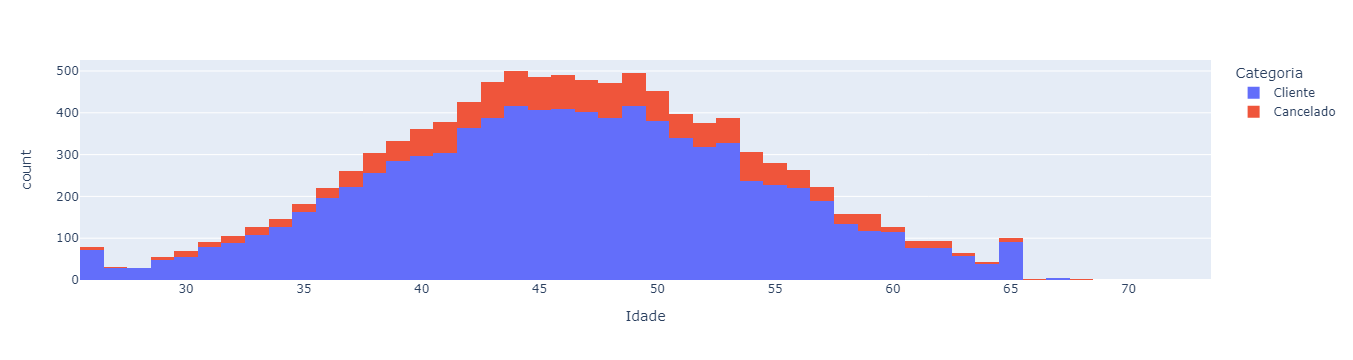

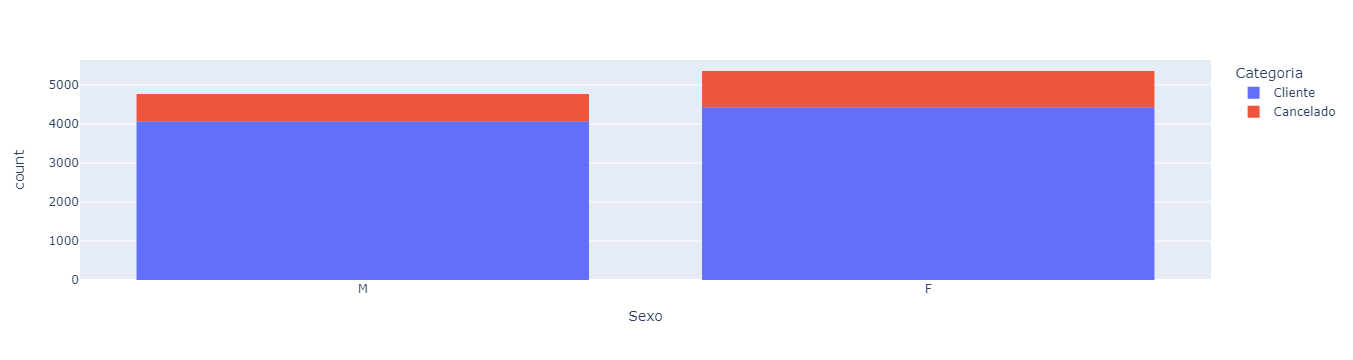

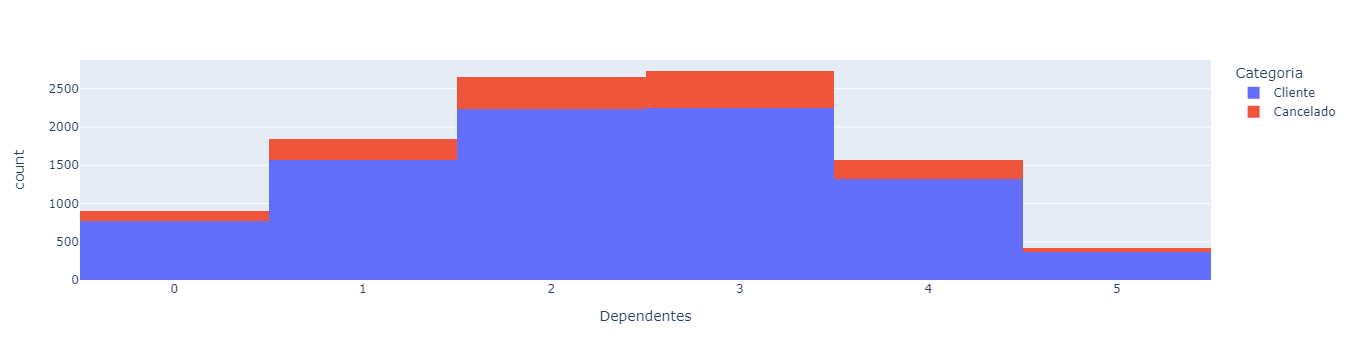

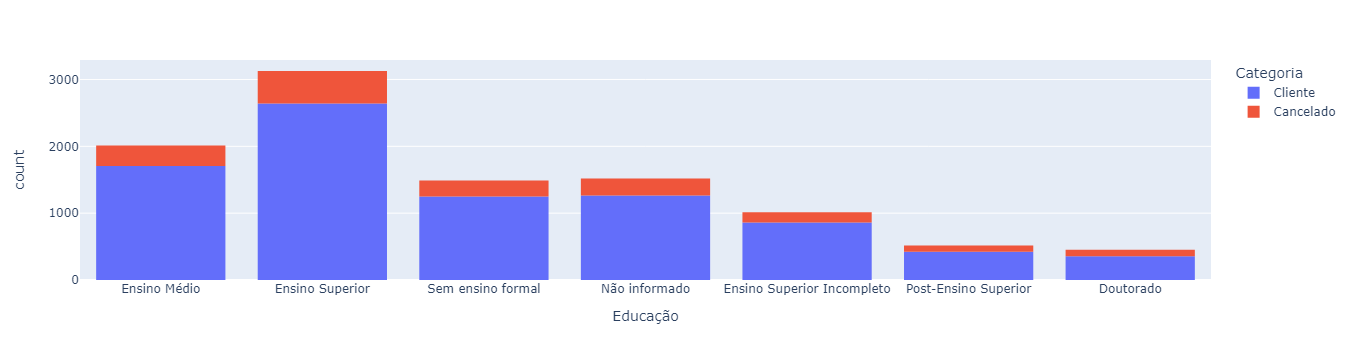

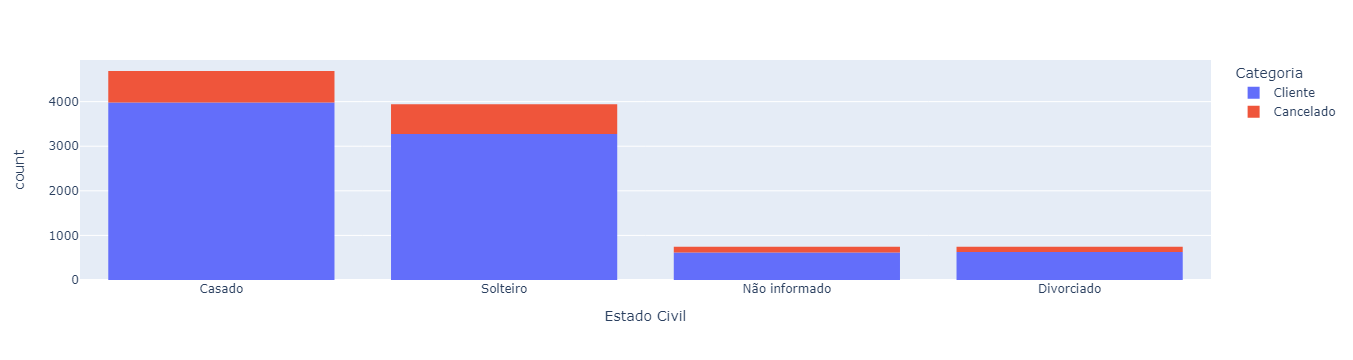

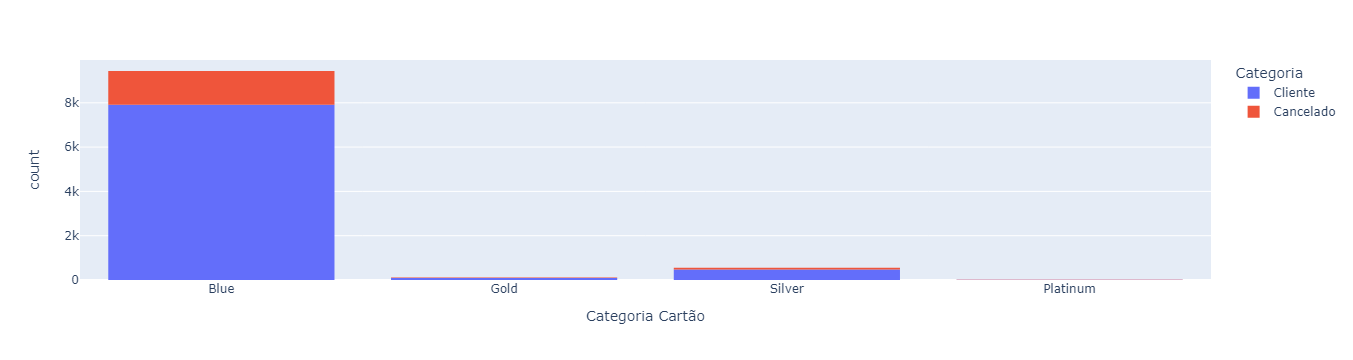

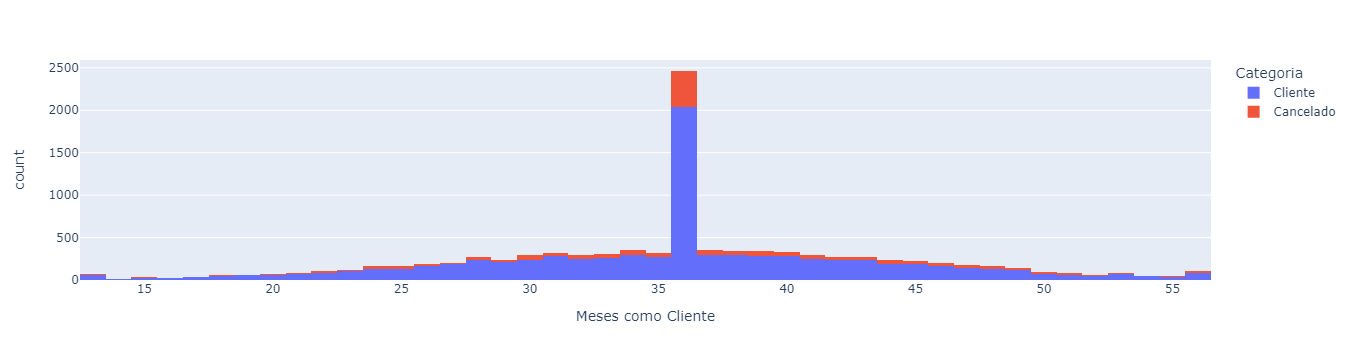

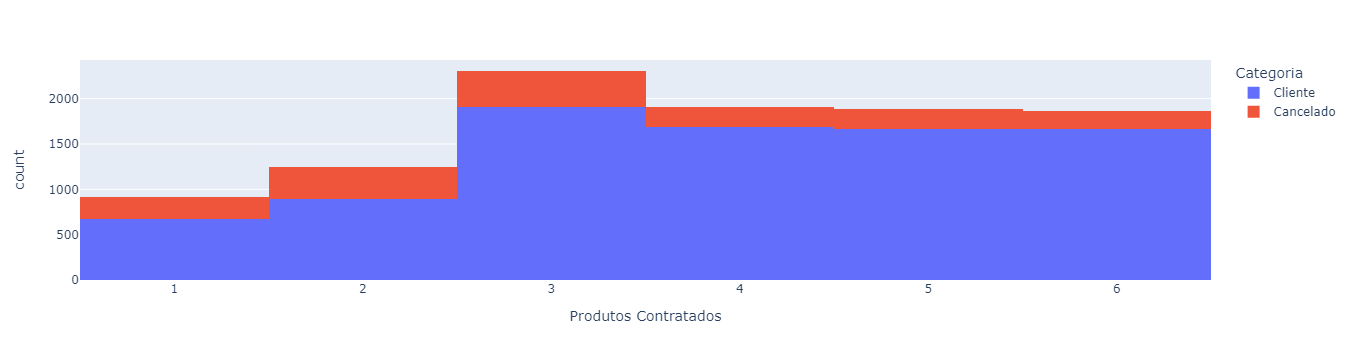

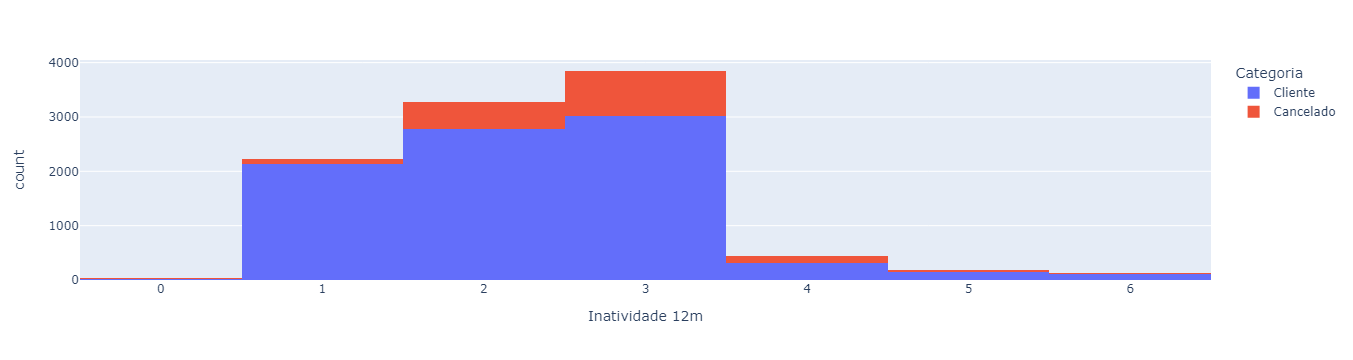

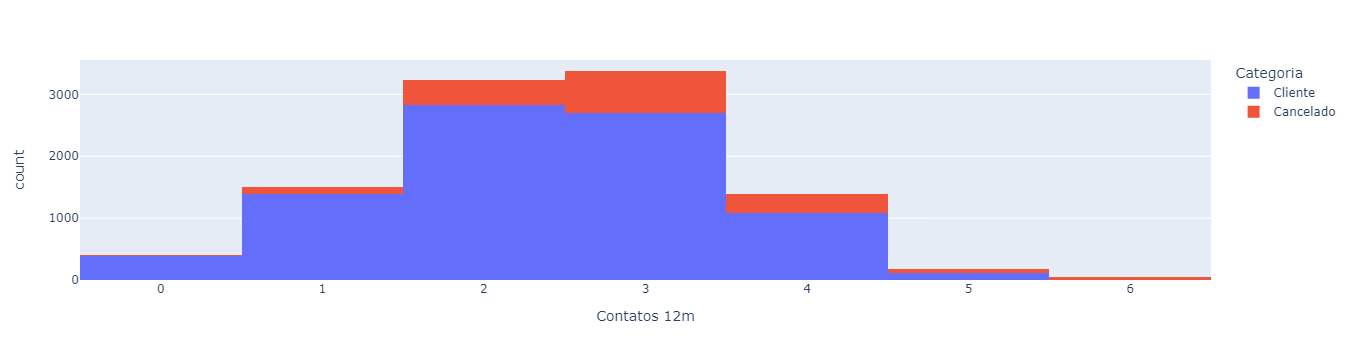

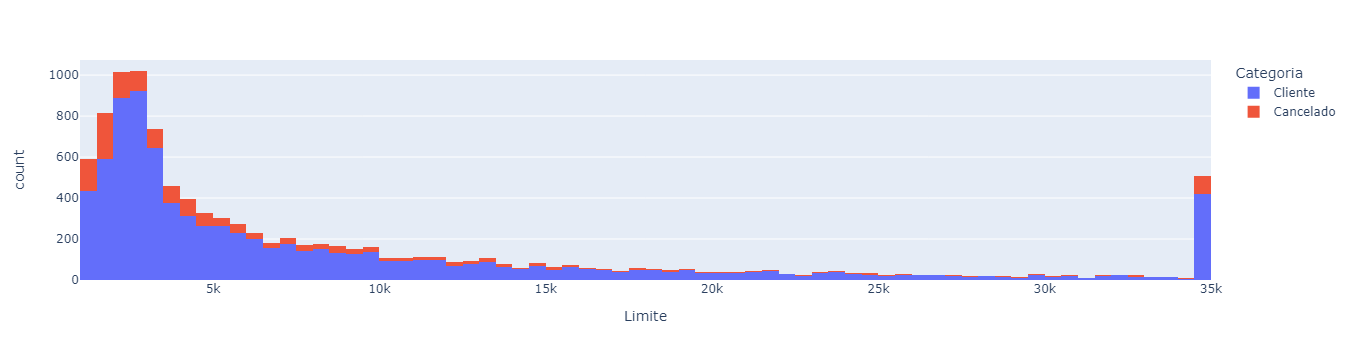

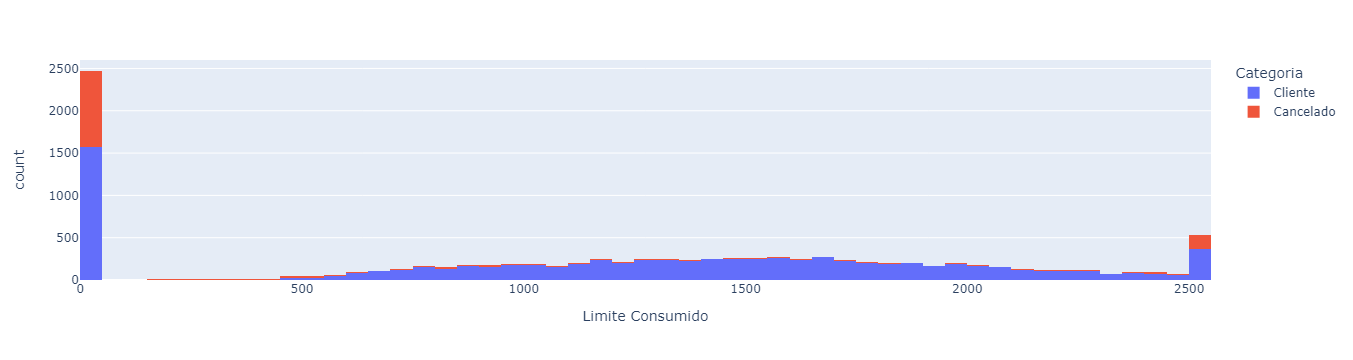

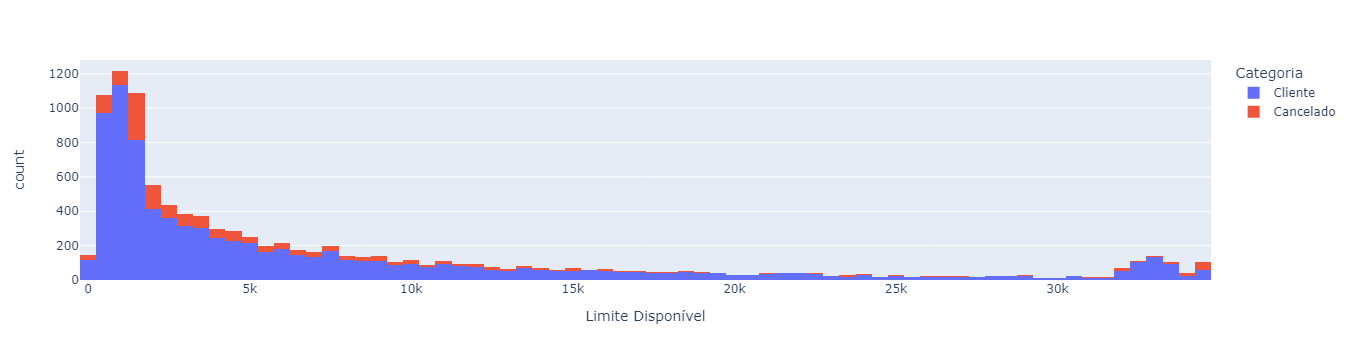

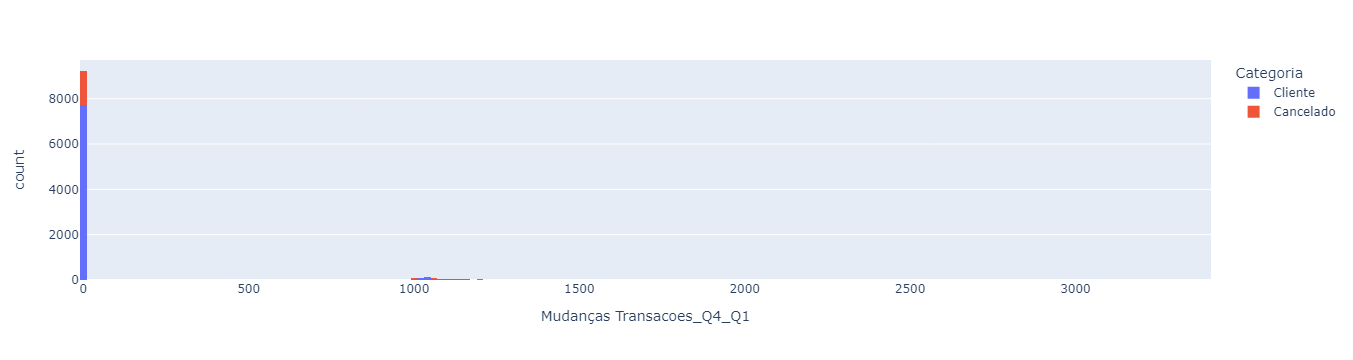

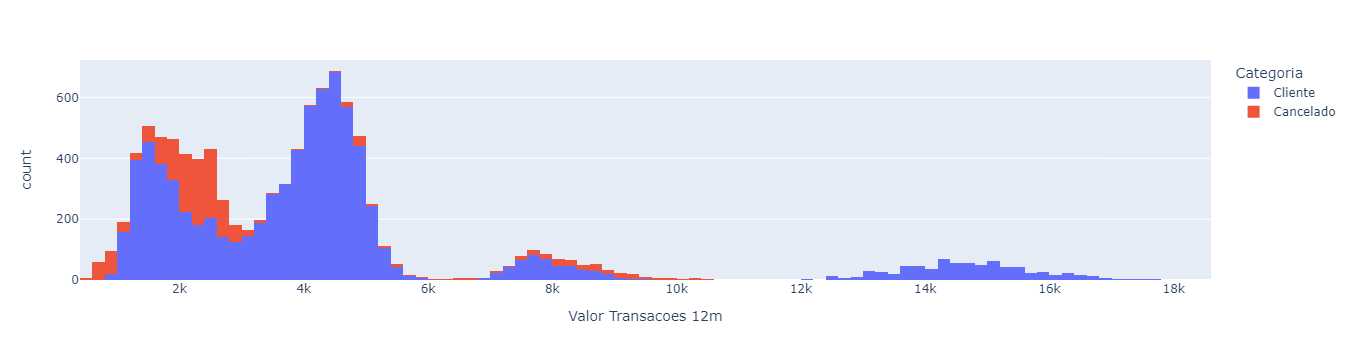

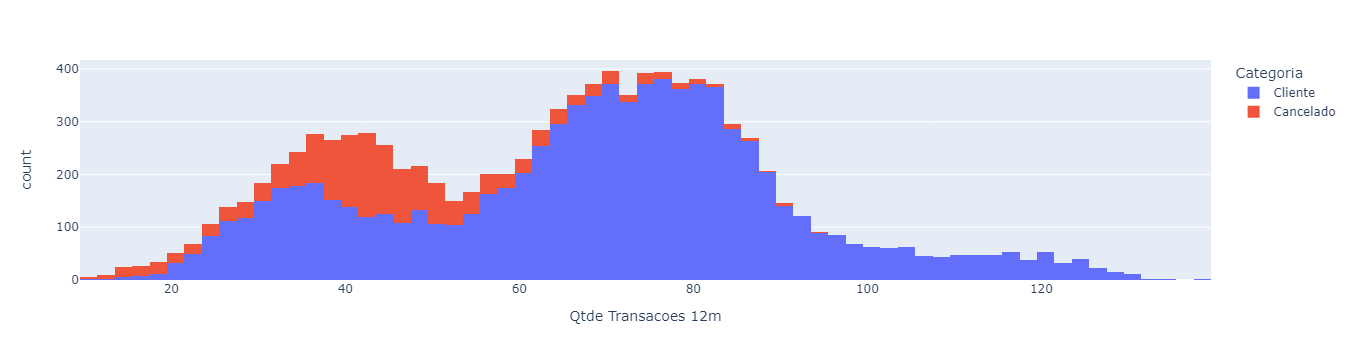

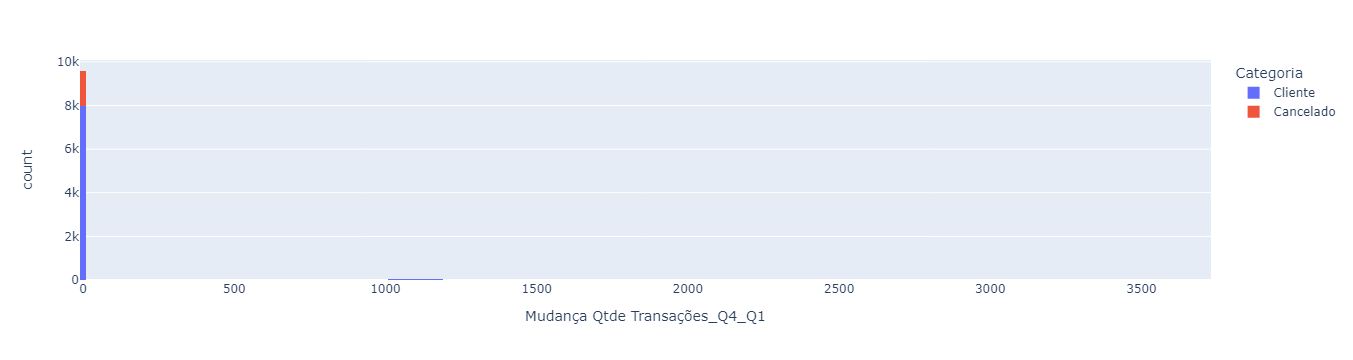

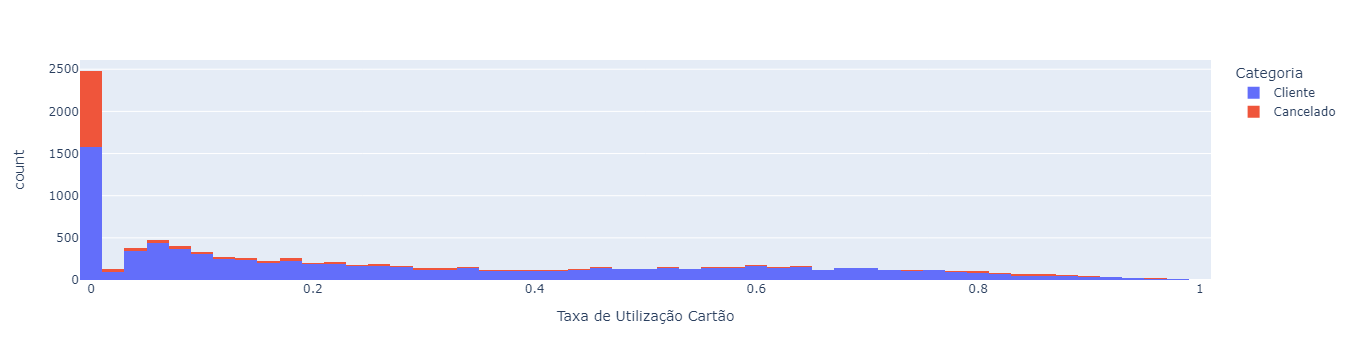

In [16]:
for coluna in tabela:
    grafico = px.histogram(tabela, x = coluna, color = "Categoria")
    grafico.show()

## Informações retiradas da análise:
- Me parece que quanto mais produtos contratados um cliente tem. menor a chance dele cancelar;
- E quanto mais transações e quanto mais o valor de transação, menor a chance dele cancelar;
- quanto maior a quantidade de contatos que a pessoa teve que fazer, maior a chance dela cancelar;